In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(2814)
random.seed(2814)

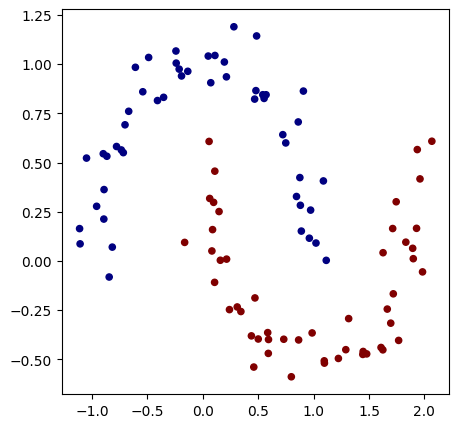

In [7]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [9]:
model = MLP(2, [16, 16, 1])

In [10]:
def loss(batch_size=None):
  if batch_size is None:
    Xb, yb = X, y
  else:
    ri = np.random.permutation(X.shape[0])[:batch_size]
    Xb, yb = X[ri], y[ri]
  inputs = [list(map(Value, xrow)) for xrow in Xb]

  scores = list(map(model, inputs))

  losses = [(1 + - yi*scorei).relu() for yi,scorei in zip(yb, scores)]
  data_loss = sum(losses) * (1.0 / len(losses))
  alpha = 1e-4
  reg_loss = alpha * sum((p*p for p in model.parameters()))
  total_loss = data_loss + reg_loss

  accuracy = [(yi > 0) == (scorei.data > 0) for yi,scorei in zip(yb, scores)]
  return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.7517960692652996, grad=0.0) 0.34


In [11]:
for k in range(100):
  total_loss, acc = loss()

  model.zero_grad()
  total_loss.backward()

  learning_rate = 1.0 - 0.9*k/100
  for p in model.parameters():
    p.data -= learning_rate * p.grad

  if k % 1 == 0:
    print(f'step {k} loss {total_loss.data}, accuracy {acc*100}%')

step 0 loss 1.7517960692652996, accuracy 34.0%
step 1 loss 1.0746986577056403, accuracy 77.0%
step 2 loss 0.8092801655797794, accuracy 53.0%
step 3 loss 0.36358217385914027, accuracy 82.0%
step 4 loss 0.336769278410645, accuracy 81.0%
step 5 loss 0.30757196862577124, accuracy 85.0%
step 6 loss 0.2731414560004392, accuracy 90.0%
step 7 loss 0.24348653999894457, accuracy 92.0%
step 8 loss 0.24374191084772132, accuracy 91.0%
step 9 loss 0.2597184159449996, accuracy 89.0%
step 10 loss 0.31224488855031923, accuracy 88.0%
step 11 loss 0.3755415529060739, accuracy 87.0%
step 12 loss 0.18773626823011044, accuracy 93.0%
step 13 loss 0.1701770281236523, accuracy 95.0%
step 14 loss 0.24675174619568926, accuracy 91.0%
step 15 loss 0.1437520799437043, accuracy 95.0%
step 16 loss 0.11581979497503583, accuracy 97.0%
step 17 loss 0.11610889759884341, accuracy 96.0%
step 18 loss 0.23994197722535854, accuracy 90.0%
step 19 loss 0.5181978666698772, accuracy 77.0%
step 20 loss 0.4129745749253669, accuracy

(-1.5888224324715874, 2.1611775675284126)

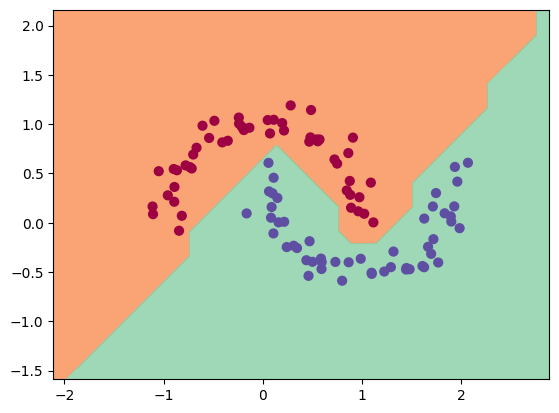

In [12]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())